# GRIP@THESPARKSFOUNDATION


### TASK 6 Author HARSH LODWAL

### Prediction using Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.set_index('Id').rename(columns={'SepalLengthCm': 'Sepal Length',
                                           'SepalWidthCm': 'Sepal Width',
                                           'PetalLengthCm': 'Petal Length',
                                           'PetalWidthCm': 'Petal Width'})
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Data Exploration

In [4]:
data.isna().sum().to_frame('Null Values')

,Null Values
Sepal Length,0
Sepal Width,0
Petal Length,0
Petal Width,0
Species,0


In [5]:
print(data.shape)

(150, 5)


In [6]:
# Detailed View of Data
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


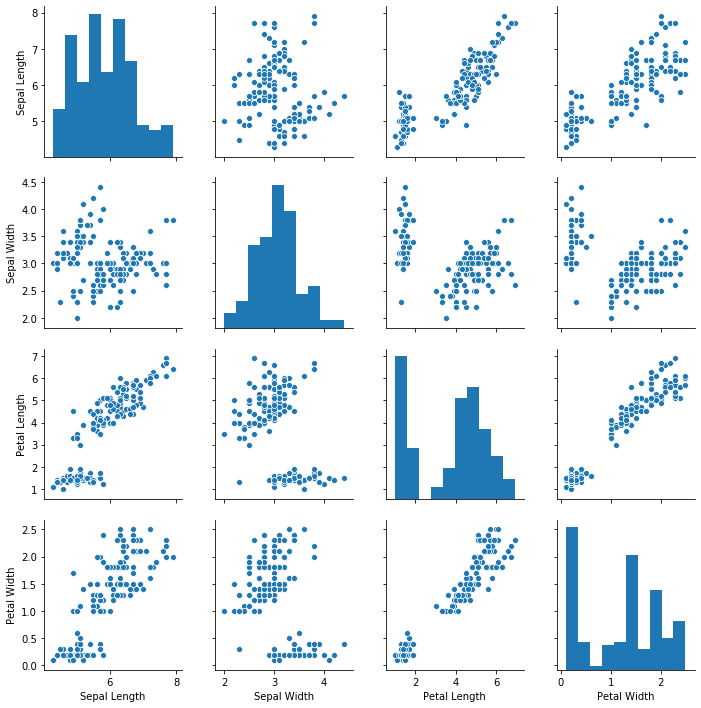

In [7]:
sns.pairplot(data)

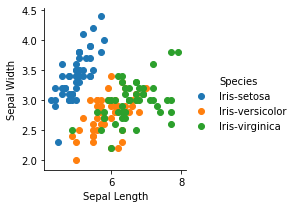

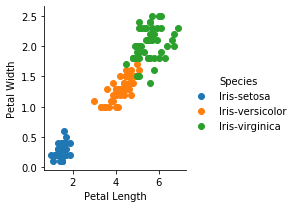

In [8]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()


### Decision Tree Model

In [9]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [10]:
X = data.drop('Species', axis=1)
y = data['Species']

In [11]:
# Splitting data into Training & Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


### Making Predictions

In [13]:
y_pred = tree_classifier.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
101,Iris-virginica,Iris-virginica
41,Iris-setosa,Iris-setosa
87,Iris-versicolor,Iris-versicolor
77,Iris-versicolor,Iris-versicolor


### Visualizing the Model

In [14]:
from sklearn import tree
text = tree.export_text(tree_classifier)
print(text)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [15]:
features = data.columns.tolist()[:-1]
target = data.Species.unique()
print(f'Features: {features}\nTarget: {target}')

Features: ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
Target: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


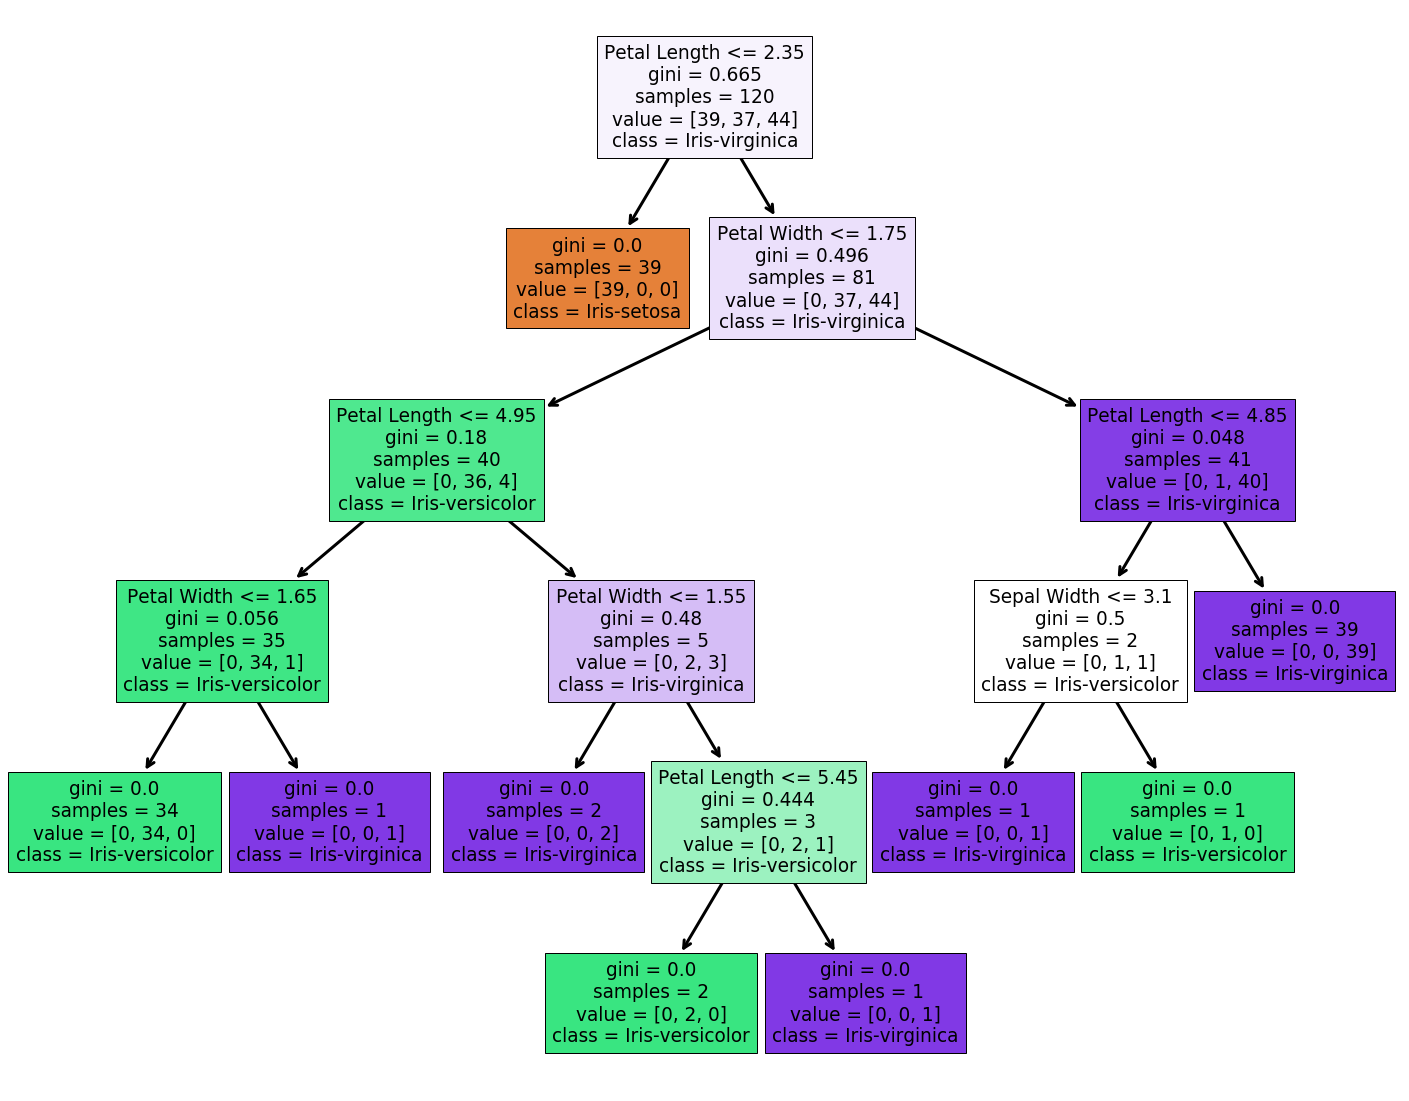

In [16]:
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(tree_classifier, feature_names=features, class_names=target, filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

### THANK YOU